In [183]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import pyart
import xarray as xr
import eccodes
import cfgrib

In [184]:
rotation_track = xr.open_dataset('/Users/juliabman/Desktop/rotation_track_netcdf/20220523/rotationtrack235800.nc',)

In [185]:
az_shear = xr.open_dataset('/Users/juliabman/Desktop/az_shear_netcdf/20220523/azshear235826.nc')

In [186]:
refl = xr.open_dataset('/Users/juliabman/Desktop/refl_grib/20220523/refl235841.nc')

In [187]:
lowlvlrefl = xr.open_dataset('/Users/juliabman/Desktop/refl_grib/20220523/lowlvlrefl235841.nc')

In [157]:
az_shear

<xarray.Dataset>
Dimensions:                                       (latitude: 7000,
                                                   longitude: 14000, time: 1)
Coordinates:
  * latitude                                      (latitude) float64 20.0 ......
  * longitude                                     (longitude) float64 -130.0 ...
  * time                                          (time) datetime64[ns] 2022-...
Data variables:
    MergedAzShear0to2kmAGL_500mabovemeansealevel  (time, latitude, longitude) float32 ...
Attributes:
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0

In [402]:
np.shape(az_shear.MergedAzShear0to2kmAGL_500mabovemeansealevel)

(1, 7000, 14000)

In [401]:
np.shape(az_shear.latitude)

(7000,)

In [397]:
az_shear.data_vars

Data variables:
    MergedAzShear0to2kmAGL_500mabovemeansealevel  (time, latitude, longitude) float32 ...

In [396]:
az_shear.MergedAzShear0to2kmAGL_500mabovemeansealevel

<xarray.DataArray 'MergedAzShear0to2kmAGL_500mabovemeansealevel' (time: 1,
                                                                  latitude: 7000,
                                                                  longitude: 14000)>
array([[[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 20.0 20.01 20.01 20.02 ... 54.99 54.99 55.0
  * longitude  (longitude) float64 -130.0 -130.0 -130.0 ... -60.01 -60.01 -60.0
  * time       (time) datetime64[ns] 2022-05-23T23:58:26
Attributes:
    short_name:  MergedAzShear0to2kmAGL_500mabovemeansealevel
    long_name:   Azimuth Shear 0-2km AGL
    level:       500 m above mean sea level
    units:       0.001/s

In [371]:
np.shape(az_shear.MergedAzShear0to2kmAGL_500mabovemeansealevel.values)

(1, 7000, 14000)

In [375]:
np.shape(az_shear.MergedAzShear0to2kmAGL_500mabovemeansealevel[0].values)

(7000, 14000)

In [511]:
az_shear.MergedAzShear0to2kmAGL_500mabovemeansealevel[0,0,:]

<xarray.DataArray 'MergedAzShear0to2kmAGL_500mabovemeansealevel' (
                                                                  longitude: 14000)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
    latitude   float64 20.0
  * longitude  (longitude) float64 -130.0 -130.0 -130.0 ... -60.01 -60.01 -60.0
    time       datetime64[ns] 2022-05-23T23:58:26
Attributes:
    short_name:  MergedAzShear0to2kmAGL_500mabovemeansealevel
    long_name:   Azimuth Shear 0-2km AGL
    level:       500 m above mean sea level
    units:       0.001/s

In [598]:
morton_lat_lower_i =  az_shear.MergedAzShear0to2kmAGL_500mabovemeansealevel.latitude > 33.5

In [599]:
morton_lat_lower_i

<xarray.DataArray 'latitude' (latitude: 7000)>
array([False, False, False, ...,  True,  True,  True])
Coordinates:
  * latitude  (latitude) float64 20.0 20.01 20.01 20.02 ... 54.99 54.99 55.0

In [600]:
morton_lat_l_i = np.where(morton_lat_lower_i == True)

In [601]:
morton_lat_l_i

(array([2700, 2701, 2702, ..., 6997, 6998, 6999]),)

In [602]:
morton_lat_array = np.array(morton_lat_l_i).flatten()

In [603]:
np.shape(morton_lat_array)

(4300,)

In [604]:
morton_lat_array

array([2700, 2701, 2702, ..., 6997, 6998, 6999])

In [605]:
morton_lon_low_i = az_shear.MergedAzShear0to2kmAGL_500mabovemeansealevel.longitude > -103

In [606]:
morton_lon_l_i = np.where(morton_lon_low_i == True)

In [607]:
morton_lon_array = np.array(morton_lon_l_i).flatten()

In [608]:
morton_low_bounds = az_shear.MergedAzShear0to2kmAGL_500mabovemeansealevel[:, morton_lat_array, morton_lon_array]

In [609]:
morton_low_bounds

<xarray.DataArray 'MergedAzShear0to2kmAGL_500mabovemeansealevel' (time: 1,
                                                                  latitude: 4300,
                                                                  longitude: 8600)>
array([[[1., 1., ..., 0., 0.],
        [1., 1., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 33.5 33.51 33.51 33.52 ... 54.99 54.99 55.0
  * longitude  (longitude) float64 -103.0 -103.0 -103.0 ... -60.01 -60.01 -60.0
  * time       (time) datetime64[ns] 2022-05-23T23:58:26
Attributes:
    short_name:  MergedAzShear0to2kmAGL_500mabovemeansealevel
    long_name:   Azimuth Shear 0-2km AGL
    level:       500 m above mean sea level
    units:       0.001/s

In [610]:
morton_lon_low

<xarray.DataArray 'longitude' (longitude: 14000)>
array([False, False, False, ...,  True,  True,  True])
Coordinates:
  * longitude  (longitude) float64 -130.0 -130.0 -130.0 ... -60.01 -60.01 -60.0

In [611]:
morton_lat_upper_i = morton_low_bounds.latitude < 34

In [612]:
morton_lat_upper_i

<xarray.DataArray 'latitude' (latitude: 4300)>
array([ True,  True,  True, ..., False, False, False])
Coordinates:
  * latitude  (latitude) float64 33.5 33.51 33.51 33.52 ... 54.99 54.99 55.0

In [613]:
morton_lat_u_i = np.where(morton_lat_upper_i == True)

In [614]:
morton_lat_u_i

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)

In [615]:
morton_upper_lat_array = np.array(morton_lat_u_i).flatten()

In [616]:
morton_lon_upper_i = morton_low_bounds.longitude < -102

In [617]:
morton_lon_u_i = np.where(morton_lon_upper_i == True)

In [618]:
morton_upper_lon_array = np.array(morton_lon_u_i).flatten()

In [619]:
morton_bounded = morton_low_bounds[:, morton_upper_lat_array, morton_upper_lon_array]

In [620]:
morton_bounded

<xarray.DataArray 'MergedAzShear0to2kmAGL_500mabovemeansealevel' (time: 1,
                                                                  latitude: 100,
                                                                  longitude: 200)>
array([[[1., 1., ..., 0., 0.],
        [1., 1., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 33.5 33.51 33.51 33.52 ... 33.99 33.99 34.0
  * longitude  (longitude) float64 -103.0 -103.0 -103.0 ... -102.0 -102.0 -102.0
  * time       (time) datetime64[ns] 2022-05-23T23:58:26
Attributes:
    short_name:  MergedAzShear0to2kmAGL_500mabovemeansealevel
    long_name:   Azimuth Shear 0-2km AGL
    level:       500 m above mean sea level
    units:       0.001/s

In [621]:
why = np.where(morton_bounded > 15)

In [622]:
morton_bounded[why][0]

<xarray.DataArray 'MergedAzShear0to2kmAGL_500mabovemeansealevel' (latitude: 6,
                                                                  longitude: 6)>
array([[16., 18., 17., 16., 18., 18.],
       [16., 18., 17., 16., 18., 18.],
       [16., 18., 17., 16., 18., 18.],
       [16., 19., 12., 16., 19., 19.],
       [16., 19., 12., 16., 19., 19.],
       [14., 17., 12., 14., 17., 17.]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 33.81 33.81 33.81 33.82 33.82 33.82
  * longitude  (longitude) float64 -102.8 -102.8 -102.8 -102.8 -102.8 -102.8
    time       datetime64[ns] 2022-05-23T23:58:26
Attributes:
    short_name:  MergedAzShear0to2kmAGL_500mabovemeansealevel
    long_name:   Azimuth Shear 0-2km AGL
    level:       500 m above mean sea level
    units:       0.001/s

In [623]:
morton_bounded[why][0].longitude

<xarray.DataArray 'longitude' (longitude: 6)>
array([-102.812501, -102.807501, -102.802501, -102.812501, -102.807501,
       -102.807501])
Coordinates:
  * longitude  (longitude) float64 -102.8 -102.8 -102.8 -102.8 -102.8 -102.8
    time       datetime64[ns] 2022-05-23T23:58:26
Attributes:
    units:      degrees_east
    long_name:  longitude

In [637]:
morton_bounded[why][0].time.data

array('2022-05-23T23:58:26.000000000', dtype='datetime64[ns]')

In [624]:
np.shape(morton_bounded[why])

(6, 6, 6)

/var/folders/4f/9s_4__q16tx5t8vmww4mv03h0000gn/T/ipykernel_35087/1766528729.py:2: UserWarning: The following kwargs were not used by contour: 'ccmap'
  plt.contourf(morton_bounded[0].longitude, morton_bounded[0].latitude,


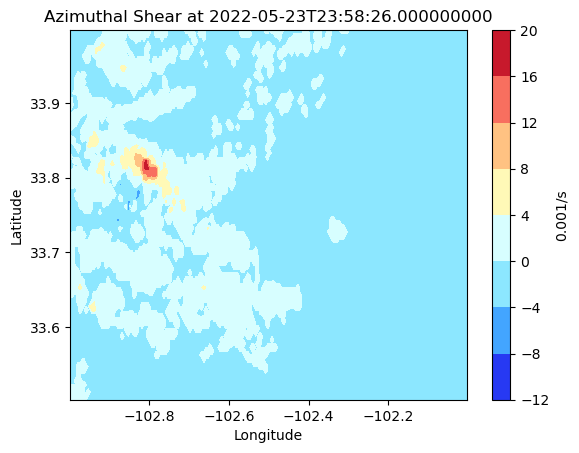

In [641]:
fig = plt.figure()
plt.contourf(morton_bounded[0].longitude, morton_bounded[0].latitude, 
             morton_bounded[0].values, cmap = 'pyart_BuDRd12', ccmap = 'PlateCaree')
plt.ticklabel_format(useOffset=False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label = '0.001/s')
plt.title(f'Azimuthal Shear at {morton_bounded[0].time.data}')
plt.show()

In [668]:
max_shear_index = np.unravel_index(np.argmax(morton_bounded[0].values), morton_bounded[0].shape)

In [669]:
max_shear = morton_bounded[0][max_shear_index]

In [676]:
max_shear_lon = max_shear.longitude

In [677]:
max_shear_lat = max_shear.latitude